# Welcome to the OBPDS Tutorial

This tutorial runs under IPython Notebook (inside of Jupyter). To run the code segments below:

1. Click on a code cell to select it.
2. Press `SHIFT+ENTER` on your keyboard or press the run cell button (<button class='fa-step-forward fa icon-play btn btn-xs btn-default'></button>) in the toolbar above to run the code cell and step forward.

A full tutorial for using the notebook interface is available [here](http://nbviewer.ipython.org/github/quantopian/ipython/blob/master/examples/Notebook/Index.ipynb).

Let's begin by configuring matplotlib to insert plots inline (between code segments):

In [1]:
# Use static, inline figures
%matplotlib inline

Next, let's import everything from OBPDS:

In [2]:
from obpds import *

Now we can use the `Layer` and `TwoTerminalDevice` classes to create a simple $pn$ diode:

In [3]:
# Create a simple pn diode
p = Layer(thickness=1*um, alloy=GaAs, doping=1e17/cm3)  # using key-word arguments
n = Layer(1*um, GaAs, -1e17/cm3)  # using positional arguments
d = TwoTerminalDevice(layers=[p, n],
                      Fp='left',  # define which contact controls the hole quasi-Fermi energy
                      Fn='right') # define which contact controls the electron quasi-Fermi energy

Next, let's simulate the device at equilibrium at room temperature (i.e. at 300 K):

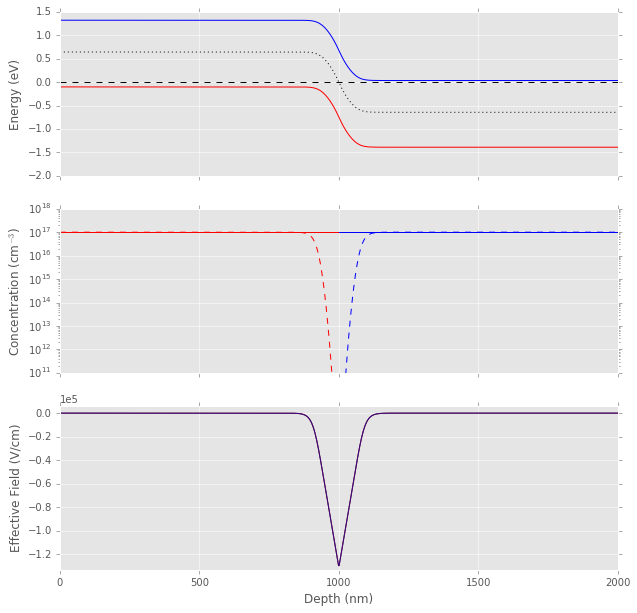

In [4]:
# Simulate and show the device at equilibrium at room temperature (300 K).
d.show_equilibrium()

We can also simulate the device at equilibrium at other temperatures (e.g. at 77 K):

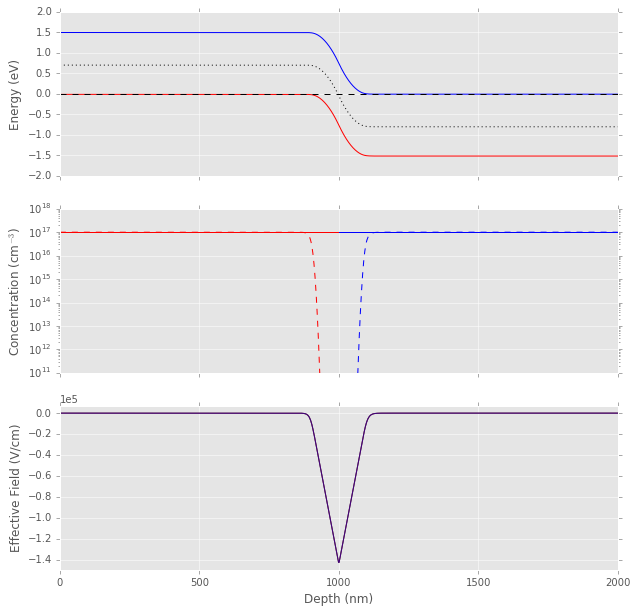

In [5]:
# Simulate and show the device at equilibrium at 77 K (assuming all dopants are still ionized).
d.show_equilibrium(T=77)

We can even simulate the device at a given bias, under the zero-current approximation:

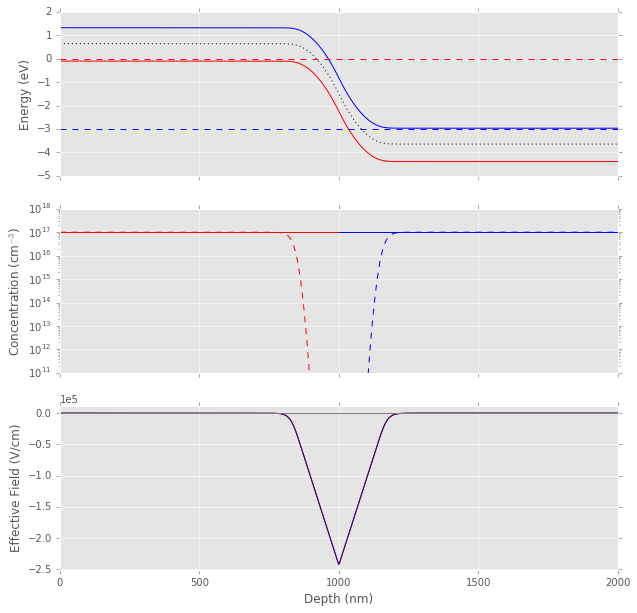

In [6]:
# Simulate and show the device at -3 V, under the zero-current approximation.
d.show_zero_current(V=-3)

Note that the quasi-Fermi energies (the dashed red and blue lines in the top-most plot) are constant. If they were not constant, then electorn and/or hole drift-diffusion currents would be flowing through the device. Such drift-diffusion simulations are not yet implemented.

However, even under the zero-current approximation, we can still simulate the C-V characteristics:

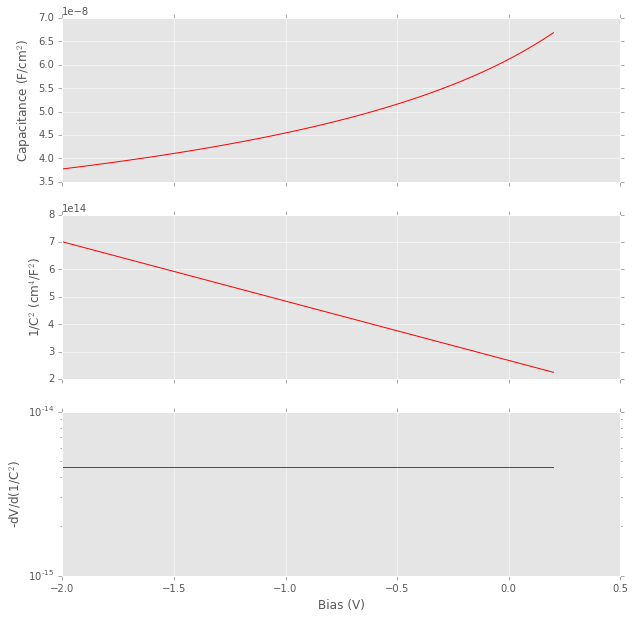

In [7]:
# Simulate the Capacitance-Voltage characteristics of the diode from -2 to 0.2 V, under the zero-current approximation.
d.show_cv(-2, 0.2)

Using the `ipywidgets` package, we can create interactive plots:

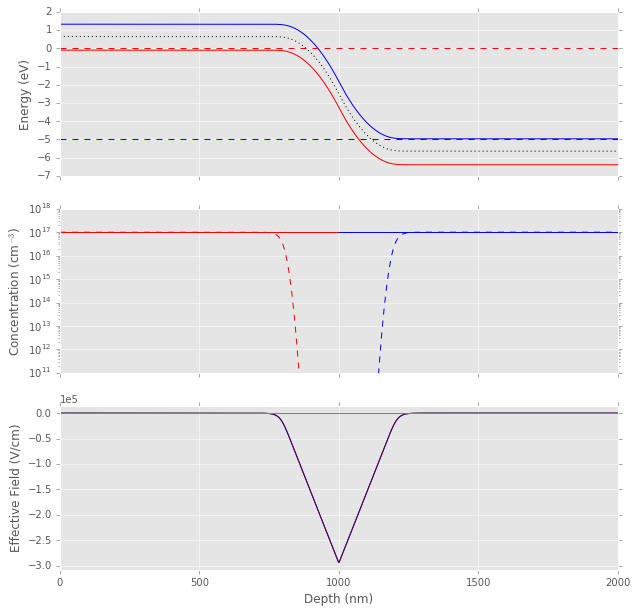

In [8]:
from ipywidgets import interactive, fixed
interactive(d.show_zero_current, V=(-10,1), N=fixed(1000), approx=fixed('kane'))

There are many III-V alloys available to work with. They are imported from the `openbandparams` package, which is documented [here](http://scott-maddox.github.io/openbandparams/). Here's an example of a GaAs/AlGaAs $pN$ heterojunction diode:

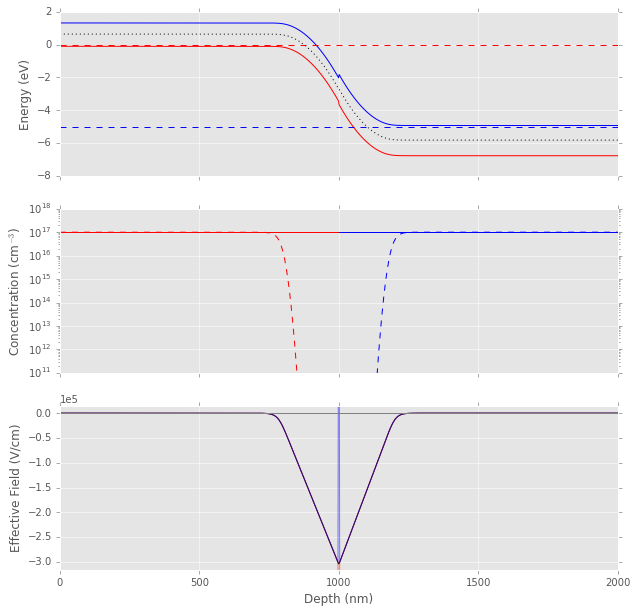

In [9]:
p = Layer(1*um, GaAs,  1e17/cm3)
N = Layer(1*um, AlGaAs(Al=0.3), -1e17/cm3)
d = TwoTerminalDevice(layers=[p, N],
                      Fp='left',
                      Fn='right')
interactive(d.show_zero_current, V=(-10,1), T=fixed(300), N=fixed(1000), approx=fixed('kane'))

That concludes the Tutorial (for now). Feel free to open new cells using the plus button (<button class='fa fa-plus icon-plus btn btn-xs btn-default'></button>), or by hitting `SHIFT+ENTER` while this cell is selected. See if you can simulate some more complicated heterostructure devices!